In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams

eng_stopwords = set(stopwords.words('english'))
color = sns.color_palette()

%matplotlib inline

train_df = pd.read_csv("../data/processed/train_title_pairs.csv").fillna("")
test_df = pd.read_csv("../data/processed/validation_title_pairs.csv").fillna("")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/igkinis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/igkinis/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
print(train_df.shape)
print(test_df.shape)

(1319922, 3)
(74304, 3)


In [35]:
train_df.describe()

label
count  1.319922e+06
mean   6.909499e-03
std    8.283576e-02
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00

In [34]:
test_df.describe()

label
count  74304.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0

In [32]:
train_df.head(5)

label                                        first_title  \
0      1  This App Will Teach You Spanish in 3 Weeks & I...   
1      1  This App Will Teach You Spanish in 3 Weeks & I...   
2      1  This App Will Teach You Spanish in 3 Weeks & I...   
3      0  This App Will Teach You Spanish in 3 Weeks & I...   
4      0  This App Will Teach You Spanish in 3 Weeks & I...   

                                          pair_title  
0  Want to Learn a New Language? Try the #1 Selli...  
1  Want to Learn a New Language? Try the #1 Selli...  
2  Heres the app you need to learn a new language...  
3  100% Ultraschall Zahnbrste fr Tiere. Empfohlen...  
4  Luxury Living Options for Seniors Near ${city:...

In [33]:
test_df.head(5)

label                                        first_title  \
0      0  1 Million People Are Using This App to Learn a...   
1      0  1 Million People Are Using This App to Learn a...   
2      0  1 Million People Are Using This App to Learn a...   
3      0  1 Million People Are Using This App to Learn a...   
4      0  1 Million People Are Using This App to Learn a...   

                                          pair_title  
0  The List Of 24 Foods That You Wouldn't Believe...  
1           14 Up You Win with Sportsbet  T&Cs Apply  
2                     Change Thy Way You Buy Glasses  
3  Real Reason "Check Engine Light" is On. (Read ...  
4       Kathleen Turner Is 63 & She Looks Incredible

Fields in both input files are : 1) Train dataframe label,first_title,pair_title
label: is_similar or not
first_title: ancor title
second_title: a pair

In [36]:
dup = train_df['label'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(dup.index,dup.values,color=color[3])
plt.ylabel("No of Occurences",fontsize=14)
plt.xlabel("Similar",fontsize=14)
plt.show()

/home/igkinis/Desktop/deeplab/dedub/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [37]:
dup
dup/dup.sum()

0    0.993091
1    0.006909
Name: label, dtype: float64

combining title columns as a single column

In [39]:
title_df=pd.DataFrame(pd.concat([train_df['first_title'],train_df['pair_title']]))
title_df.columns=["titles"]
title_df["titles"] = title_df["titles"].apply(lambda x : len(str(x).split()))

/home/igkinis/Desktop/deeplab/dedub/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


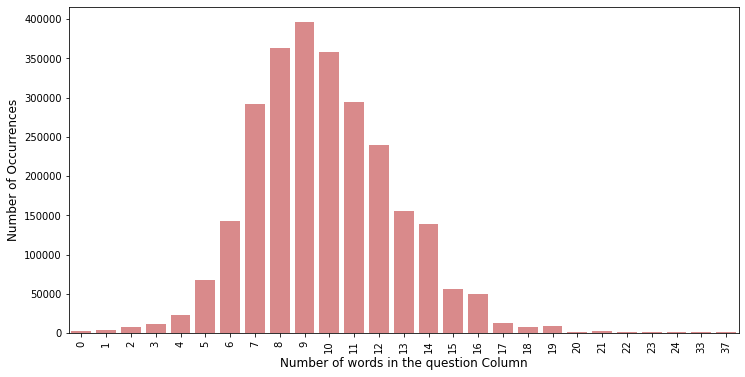

In [40]:
count =title_df['titles'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.6, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question Column', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Checking the character in question

/home/igkinis/Desktop/deeplab/dedub/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


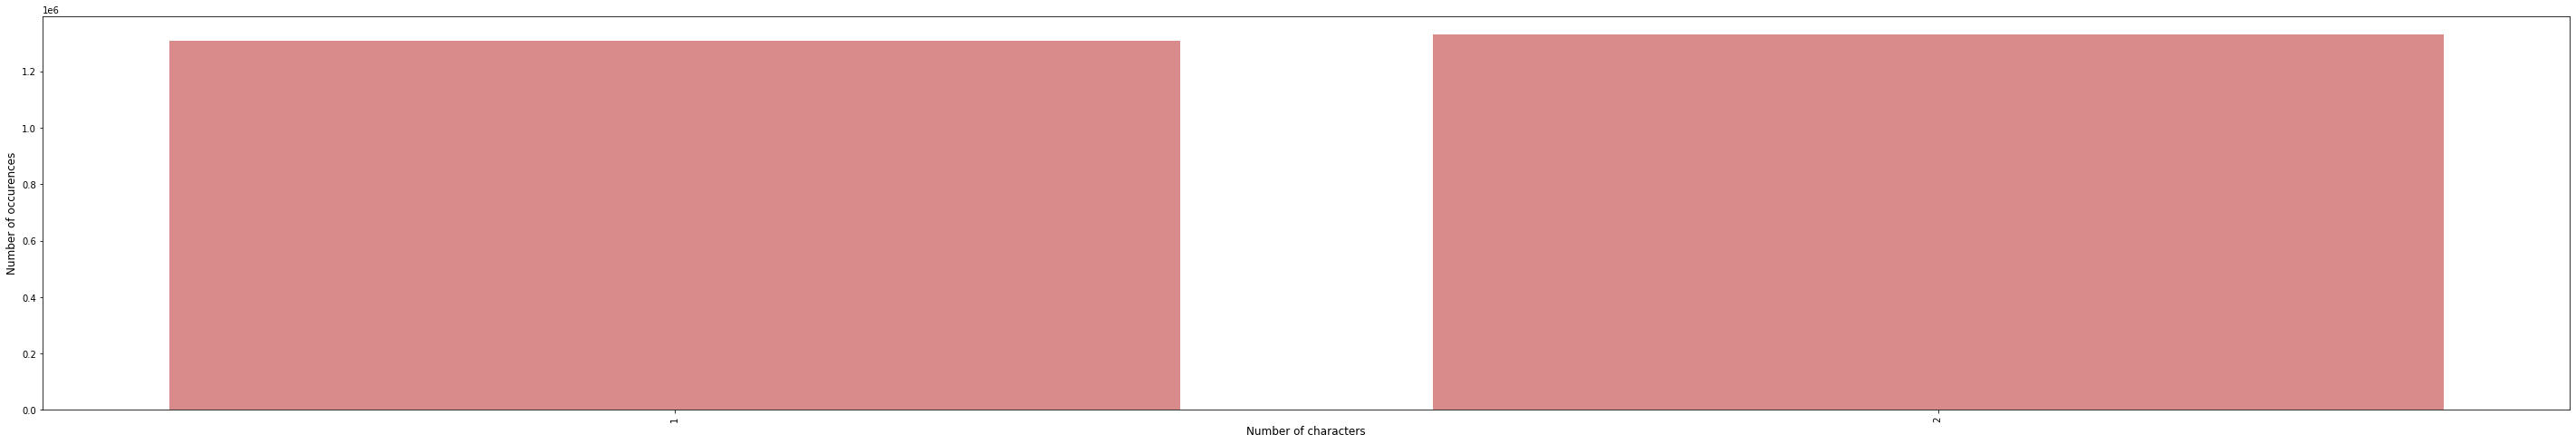

In [41]:
title_df["no_of_characters"]=title_df["titles"].apply(lambda x : len(str(x)))
count = title_df['no_of_characters'].value_counts()

plt.figure(figsize=(50,8))
sns.barplot(count.index,count.values,alpha=0.6,color=color[3])
plt.ylabel('Number of occurences',fontsize=12)
plt.xlabel('Number of characters',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Getting common words from title1 and pair_title in dataset

In [ ]:
def get_unigrams(que):
    return [word for word in word_tokenize(que.lower()) if word not in eng_stopwords]

def get_common_unigrams(row):
    return len( set(row["unigrams_ques1"]).intersection(set(row["unigrams_ques2"])) )

def get_common_unigram_ratio(row):
    return float(row["unigrams_common_count"]) / max(len( set(row["unigrams_ques1"]).union(set(row["unigrams_ques2"])) ),1)

train_df["unigrams_ques1"] = train_df['first_title'].apply(lambda x: get_unigrams(str(x)))
train_df["unigrams_ques2"] = train_df['pair_title'].apply(lambda x: get_unigrams(str(x)))
train_df["unigrams_common_count"] = train_df.apply(lambda row: get_common_unigrams(row),axis=1)
train_df["unigrams_common_ratio"] = train_df.apply(lambda row: get_common_unigram_ratio(row), axis=1)

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="is_duplicate", y="unigrams_common_count", data=train_df, palette="muted")
plt.xlabel('Is duplicate', fontsize=12)
plt.ylabel('Common unigrams count', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="is_duplicate", y="unigrams_common_ratio", data=train_df, palette="muted")
plt.xlabel('Is duplicate', fontsize=12)
plt.ylabel('Common unigrams ratio', fontsize=12)
plt.show()